In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

# EDA

## studying the data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


**shape of dataset**

In [5]:
df.shape

(25, 2)

In [6]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**statistics of data**

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Vizualisation

**checking for outliers**

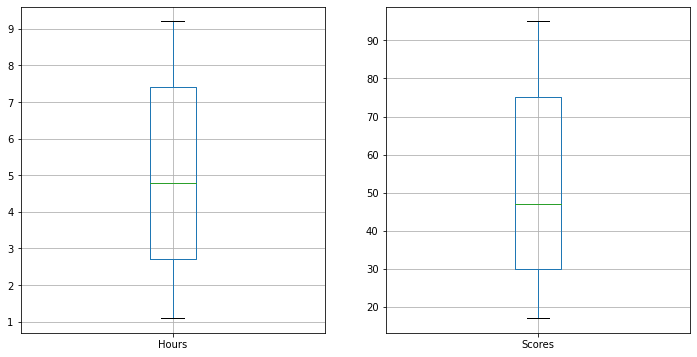

In [8]:
plt.figure(figsize=[12,6])
rows=1
col = len(df.columns)//rows
j=0
for i in df.columns:
    j+=1
    plt.subplot(rows,col,j)
    df.boxplot(i)
plt.show()

**scatter plot**

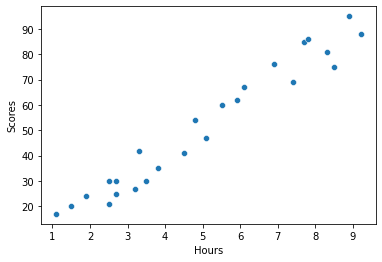

In [9]:
sns.scatterplot(x="Hours",y="Scores",data=df);

 **checking if the data follows normal distribution**

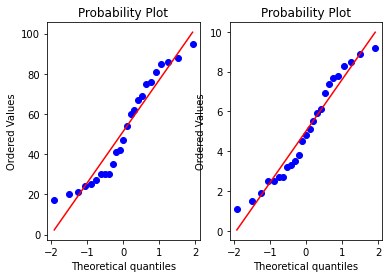

In [10]:
from scipy.stats import probplot
plt.subplot(1,2,1)
probplot(x=df.Scores,plot=plt)
plt.subplot(1,2,2)
probplot(x=df.Hours,plot=plt)
plt.show();

**correlation of the dataset**

<AxesSubplot:>

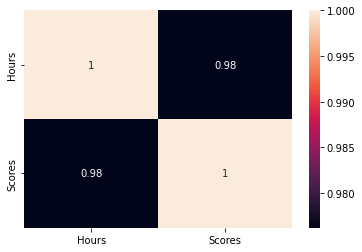

In [11]:
sns.heatmap(data=df.corr(),annot=True)

### Data can be said to be highly correlated

# Building the model

In [12]:
# importing libraries for building model

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
# Identifying X and y

X = np.array(df.Hours).reshape(-1,1)
y= np.array(df.Scores).reshape(-1,1)

In [14]:
#spliting of data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=42)

In [15]:
# creating model

linear_model = LinearRegression()

linear_model.fit(X_train,y_train)

# Coeficient of X

coeficient = linear_model.coef_
print("coeficient: ",coeficient.item())

coeficient:  9.69663193053782


In [16]:
# intercept of y

inter = linear_model.intercept_

print("the intercept of y: ",inter.item())

the intercept of y:  2.85161829049882


the equation of the line is: (coeficient) * X + intercept

equation for this line becomes:

9.69663193053782 * X + 2.85161829049882

## Prediction for unseen data

In [17]:
pred_y = linear_model.predict(X_test)
print("\n test set \n",X_test,"\n\n real y\n",y_test,"\n\npredicted values :\n",pred_y)


 test set 
 [[8.3]
 [2.5]
 [2.5]
 [6.9]] 

 real y
 [[81]
 [30]
 [21]
 [76]] 

predicted values :
 [[83.33366331]
 [27.09319812]
 [27.09319812]
 [69.75837861]]


## Evaluating the model

In [18]:
R2Error = linear_model.score(X_test,y_test)
print("R square error : ",R2Error)

R square error :  0.9685603135908576


In [19]:
RMSE = mean_squared_error(y_test,pred_y,squared=False)
print("Root mean squared error : ",RMSE)

Root mean squared error :  4.742899495639919


In [20]:
MSE = mean_squared_error(y_test,pred_y)
print("Mean squared error : ",MSE)

Mean squared error :  22.4950956257414


In [21]:
MAE = mean_absolute_error(y_test,pred_y)
print("Mean absolute error : ",MAE)

Mean absolute error :  4.393821175688238


## Plotting the predicted line

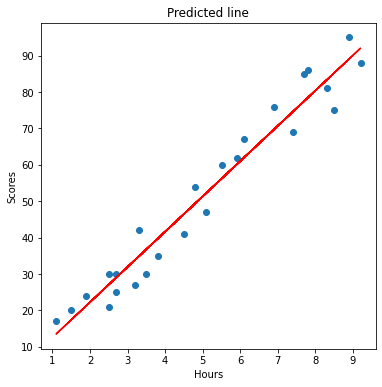

In [22]:
plt.figure(figsize=[6,6])
plt.scatter(x=X,y=y)
plt.plot(X,linear_model.predict(X),color='r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Predicted line")
plt.show();

## making prediction for the student studing for 9.25 hours/day

In [23]:
ans = linear_model.predict(X=np.array([9.25]).reshape(-1,1))

print("predicted score for a student who studies 9.25 hrs/day:- ",ans.item())

predicted score for a student who studies 9.25 hrs/day:-  92.54546364797365
